In [30]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
df = yf.download("RELIANCE.NS", period="2y", interval="1d")

if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)

df

/tmp/ipython-input-1910391335.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("RELIANCE.NS", period="2y", interval="1d")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2024-01-01,1285.609741,1293.848810,1277.122509,1280.795398,4030540
2024-01-02,1296.255859,1297.893761,1277.048049,1283.003966,7448800
2024-01-03,1282.160156,1307.323883,1279.132516,1295.412048,9037536
2024-01-04,1288.786011,1295.337617,1280.075579,1284.492835,9612778
2024-01-05,1294.270508,1300.300947,1289.456165,1291.888117,8086406
...,...,...,...,...,...
2025-12-23,1570.699951,1580.900024,1568.099976,1580.900024,7506564
2025-12-24,1558.199951,1575.699951,1553.599976,1572.699951,8815745
2025-12-26,1559.199951,1561.000000,1554.300049,1554.699951,2311495


In [32]:
df["SMA_50"] = df["Close"].rolling(window=50).mean()
df["SMA_200"] = df["Close"].rolling(window=200).mean()

df

Price,Close,High,Low,Open,Volume,SMA_50,SMA_200
Date,,,,,,,
2024-01-01,1285.609741,1293.848810,1277.122509,1280.795398,4030540,NaN,NaN
2024-01-02,1296.255859,1297.893761,1277.048049,1283.003966,7448800,NaN,NaN
2024-01-03,1282.160156,1307.323883,1279.132516,1295.412048,9037536,NaN,NaN
2024-01-04,1288.786011,1295.337617,1280.075579,1284.492835,9612778,NaN,NaN
2024-01-05,1294.270508,1300.300947,1289.456165,1291.888117,8086406,NaN,NaN
...,...,...,...,...,...,...,...
2025-12-23,1570.699951,1580.900024,1568.099976,1580.900024,7506564,1510.836006,1411.685670
2025-12-24,1558.199951,1575.699951,1553.599976,1572.699951,8815745,1514.482004,1413.622052
2025-12-26,1559.199951,1561.000000,1554.300049,1554.699951,2311495,1518.180002,1415.394111


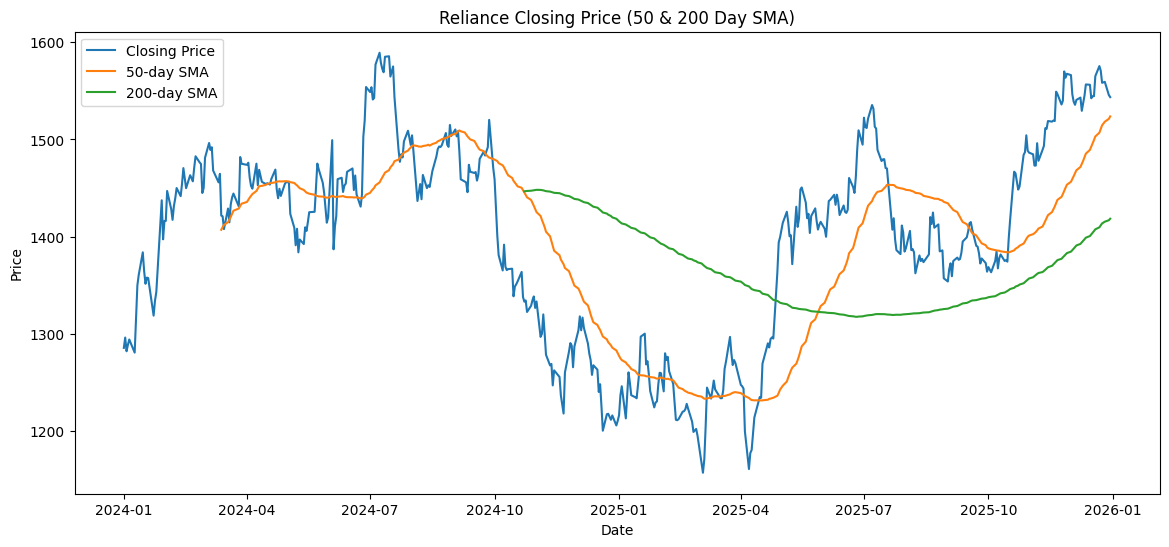

In [33]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df["Close"], label="Closing Price")
plt.plot(df.index, df["SMA_50"], label="50-day SMA")
plt.plot(df.index, df["SMA_200"], label="200-day SMA")

plt.title("Reliance Closing Price (50 & 200 Day SMA)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

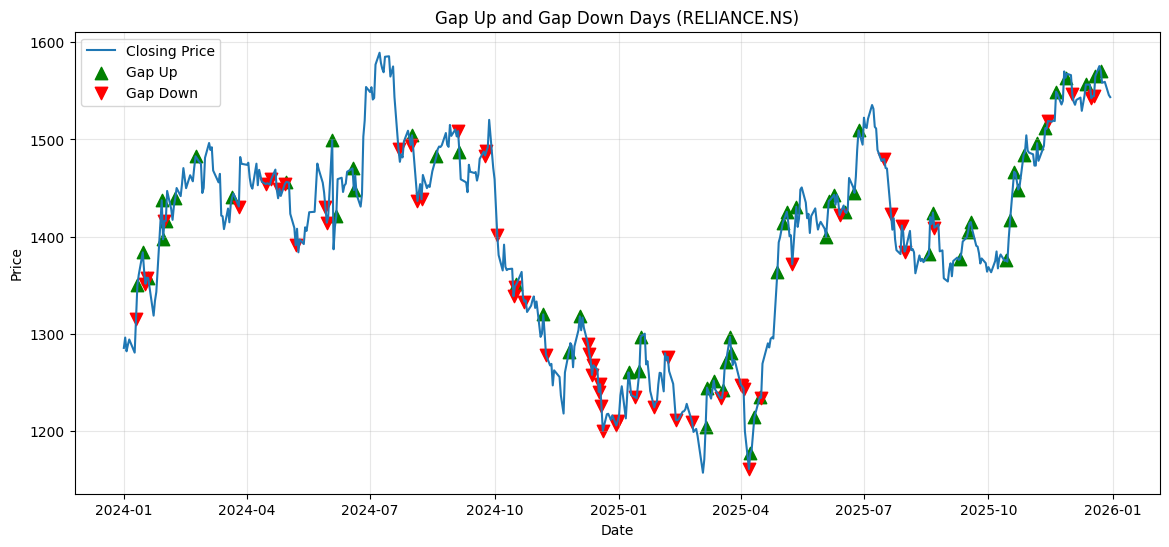

In [34]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df["Close"], label="Closing Price")


gap_up_idx = df["Open"] > df["High"].shift(1)
plt.scatter(
    df.index[gap_up_idx],
    df.loc[gap_up_idx, "Close"],
    marker="^",
    color = "green",
    s=80,
    label="Gap Up"
)


gap_down_idx = df["Open"] < df["Low"].shift(1)
plt.scatter(
    df.index[gap_down_idx],
    df.loc[gap_down_idx, "Close"],
    marker="v",
    color = "red",
    s=80,
    label="Gap Down"
)

plt.title("Gap Up and Gap Down Days (RELIANCE.NS)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [35]:
intraday = yf.download("RELIANCE.NS", period="1d", interval="5m")

if isinstance(intraday.columns, pd.MultiIndex):
    intraday.columns = intraday.columns.get_level_values(0)

intraday


/tmp/ipython-input-2190954483.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  intraday = yf.download("RELIANCE.NS", period="1d", interval="5m")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Datetime,,,,,
2025-12-30 03:45:00+00:00,1546.699951,1547.000000,1543.300049,1547.000000,130121
2025-12-30 03:50:00+00:00,1546.099976,1547.099976,1544.900024,1546.699951,70411
2025-12-30 03:55:00+00:00,1549.199951,1549.199951,1544.800049,1545.800049,81002
2025-12-30 04:00:00+00:00,1550.500000,1550.500000,1547.900024,1549.400024,88066
2025-12-30 04:05:00+00:00,1552.099976,1553.599976,1550.099976,1550.500000,476295
2025-12-30 04:10:00+00:00,1551.400024,1552.300049,1550.400024,1552.300049,40282
2025-12-30 04:15:00+00:00,1549.900024,1551.800049,1549.900024,1551.400024,28625
2025-12-30 04:20:00+00:00,1550.300049,1550.900024,1549.500000,1549.900024,31661
2025-12-30 04:25:00+00:00,1550.099976,1551.000000,1549.500000,1550.300049,35154


In [36]:
typical_price = (intraday["High"] + intraday["Low"] + intraday["Close"]) / 3

intraday["VWAP"] = ((typical_price * intraday["Volume"]).cumsum() / intraday["Volume"].cumsum())


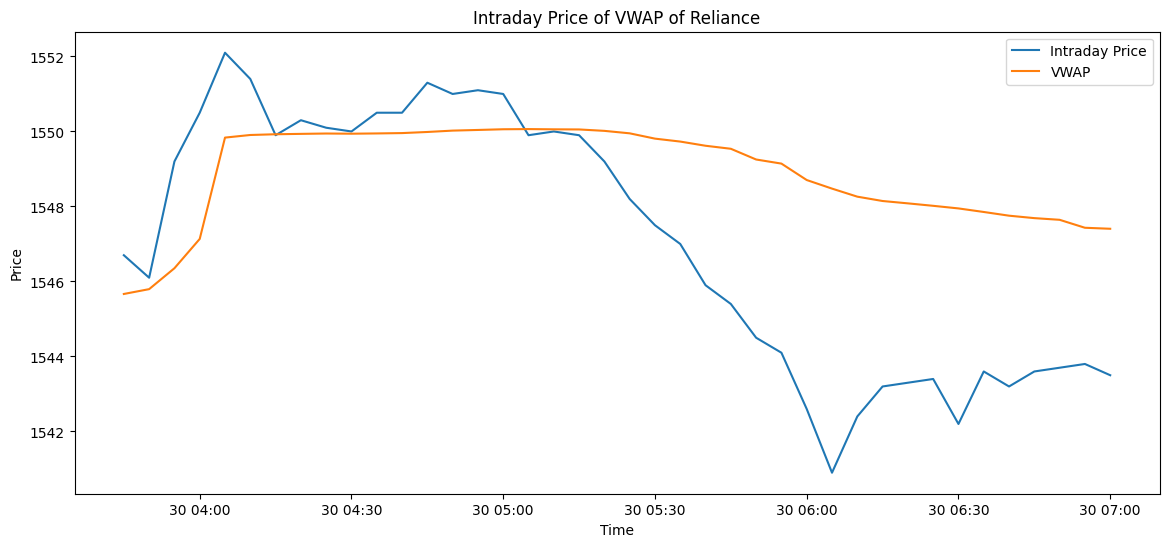

In [37]:
plt.figure(figsize=(14, 6))

plt.plot(intraday.index, intraday["Close"], label="Intraday Price")
plt.plot(intraday.index, intraday["VWAP"], label="VWAP")

plt.title("Intraday Price of VWAP of Reliance")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()
